# **Exploring CO2 Emissions Across time in Vietnam**

## *By Katie Chu, Jacqueline Vo*

## Motivation

In [ ]:
#Delete  this after its just to upload files so we can run it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This case study explores how different countries have contributed to Carbon Dioxide (CO2) emissions over time and how CO2 emission rates may relate to increasing global temperatures and increased rates of natural disasters and storms. We used this report from the EPA as the basis for motivating this case study, as it provides background information about how CO2 emissions and other greenhouse gases have influenced various climate and weather patterns.

We chose Vietnam because it is rapidly developing with goals to increase its GDP by 6% in the next 20 years, according to the World Bank. However, its growing ambitions are not without the challenge of CO2 emissions.

Additionally, Vietnam is one of the most vulnerable countries to climate change. It is a country that faces threatening natural disasters such as typhoons, floods, droughts, and landslides that affect economic assets according to the International Trade Administration.

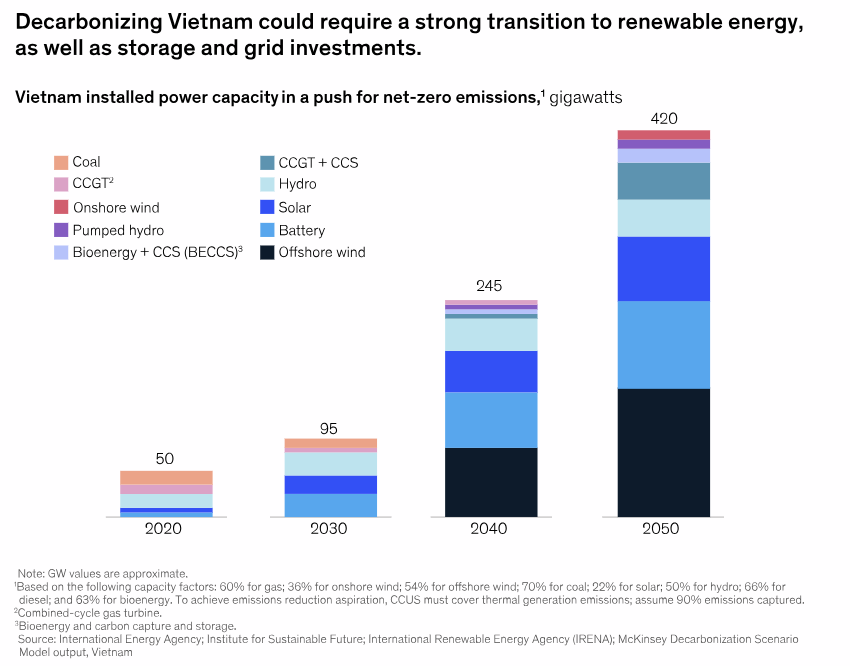

It is important to note that coal is the largest source of CO2 emissions according to a report from the International Energy Agency.
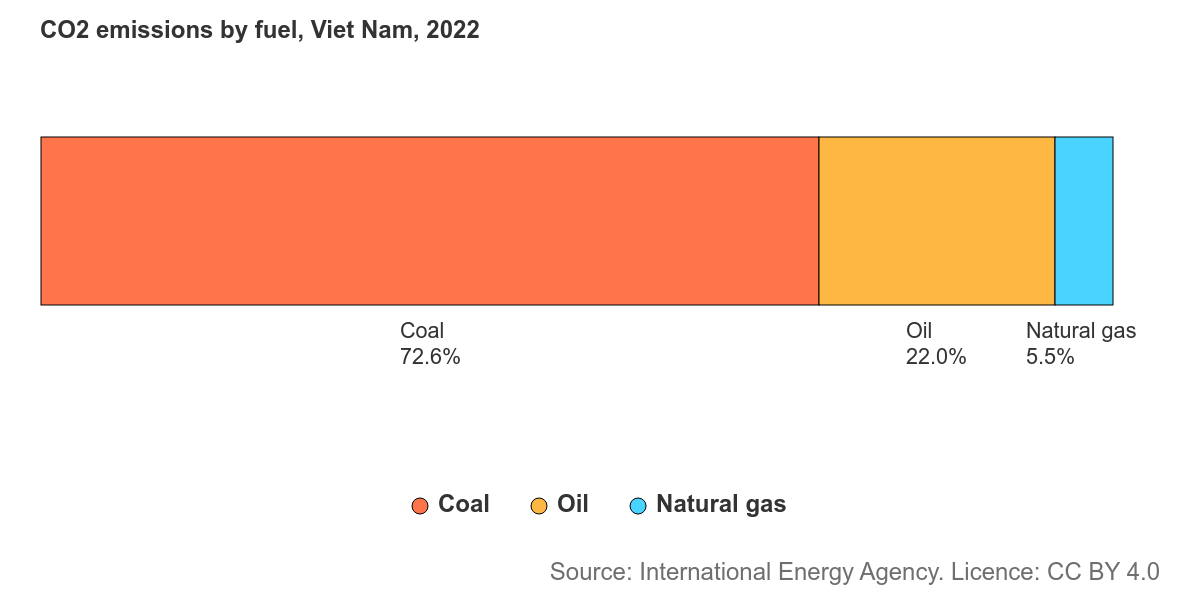

Moreover, Vietnam is currently not on track for a 1.5 degree celsius world. Specifically, Vietnam would need to reduce its emissions to below 296 mtCO2e by 2030 and below 248 MtCO2e by 2050 to be within its emissions allowance of the global 1.5 degree celsius.

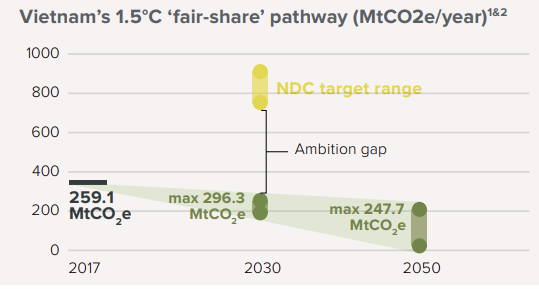

Citations:

Agarwal, Vishal, et al. “Charting a Path for Vietnam to Achieve Its Net-Zero Goals.” McKinsey & Company, McKinsey & Company, 14 Oct. 2022, www.mckinsey.com/capabilities/sustainability/our-insights/charting-a-path-for-vietnam-to-achieve-its-net-zero-goals.

Vietnam, www.climate-transparency.org/wp-content/uploads/2021/11/Vietnam-CP2020.pdf. Accessed 16 Aug. 2025.

Viet Nam - Countries & Regions - IEA, www.iea.org/countries/viet-nam/emissions. Accessed 16 Aug. 2025.

# Main Research Questions

1. How has Vietnam's CO2 emissions changed over time? And how
does Vietnam compare to other countries (the rest of the world)?
2. Are CO2 emissions, temperature, and natural disasters in Vietnam
associated?

# Context

Now we will describe a bit more background about greenhouse gas emissions and the potential influence of these emissions on public health.

Greenhouse gas emissions are due to both natural processes and anthropogenic (human-derived) activities.

These emissions are one of the contributing factors to rising global temperatures, which can have a great influence on public health as illustrated in the following image:

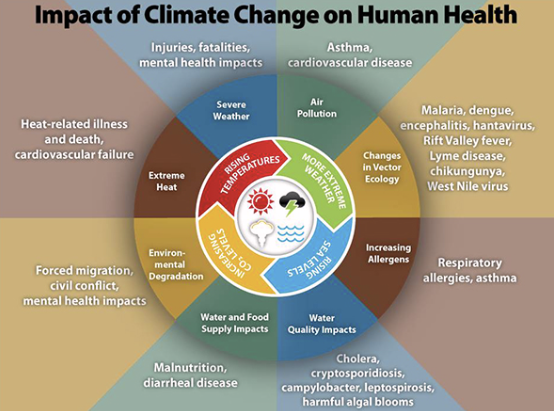

Gases in the atmosphere can contribute to climate change both directly and indirectly. Direct effects occur when the gas itself absorbs radiation. Indirect radiative forcing occurs when chemical transformations of the substance produce other greenhouse gases, when a gas influences the atmospheric lifetimes of other gases, and/or when a gas affects atmospheric processes that alter the radiative balance of the earth (e.g., affect cloud formation or albedo).

The Global Warming Potential (GWP) compares the ability of a greenhouse gas to trap heat in the atmosphere relative to another gas.

The GWP of a greenhouse gas is defined as the ratio of the accumulated radiative forcing within a specific time horizon caused by emitting 1 kilogram of the gas, relative to that of the reference gas CO2 (IPCC 2013). Therefore GWP-weighted emissions are provided in million metric tons of CO2 equivalent (MMT CO2 Eq.)

CO2 is actually the least heat-trapping gas of the greenhouse gases:

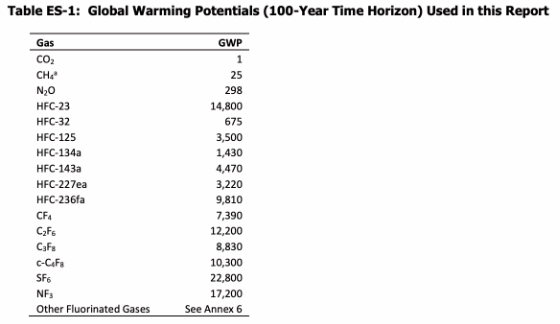

However, because CO2 is so much more abundant and stays in the atmosphere so much longer than other greenhouse gases, it has been the largest contributor to global warming. See here for more details.

It is also important to keep in mind that there is a lag between greenhouse gas emissions and temperature changes that we experience because much of Earth’s thermal energy (and CO2) gets stored in the ocean.

Due to a process called thermal inertia, the heat stored in the ocean will eventually be transfered to the surface of the Earth long after the gases were emitted that resulted in the increased ocean temperature.

See here for more explanation.

Furthermore, rising CO2 levels in the ocean also influence ocean acidity:

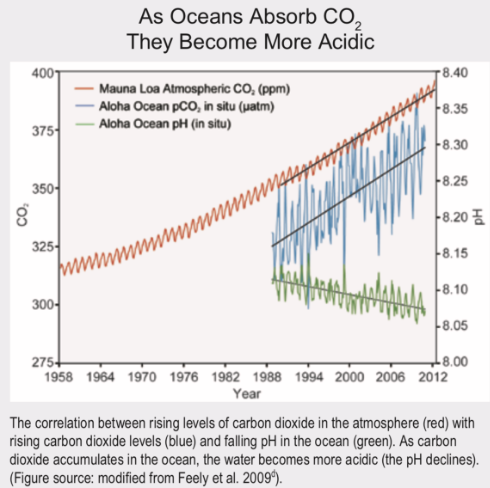

As CO2 levels rise in the ocean, the pH becomes more acidic, which makes it difficult for organisms to maintain their shells or skeletons that are made of calcium carbonate, thus making it more difficult for these organisms to survive and impacting their role in the ecosystem and food chain.

Furthermore, greenhouse gas emissions are believed to influence weather patterns as shown in this report.

Indeed, events with high levels of precipitation which can induce flooding and property damage are generally increasing around the country:

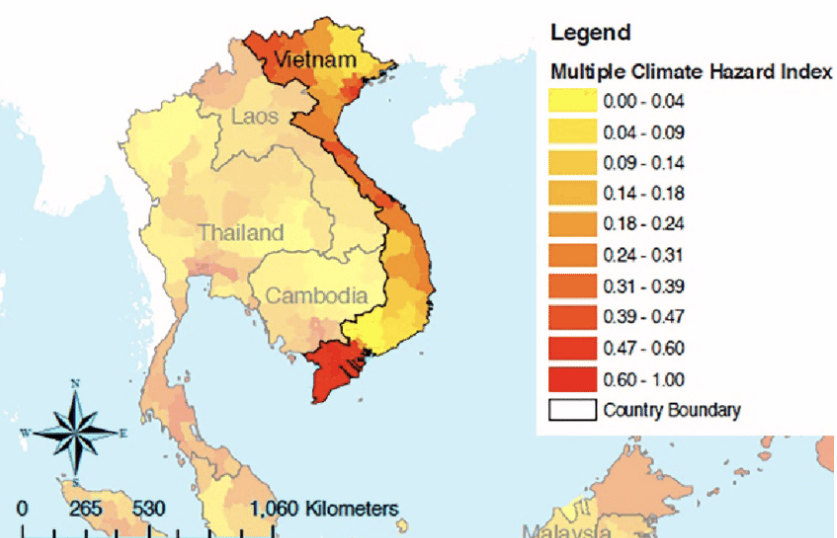

# What are the Data?

In this case study we will be using data related to CO2 emissions, as well as other data that may influence, be influenced or relate to CO2 emissions. Most of our data is from Gapminder that was originally obtained from the World Bank.

In addition, we will use some data that is specific to the United States from the National Oceanic and Atmospheric Administration (NOAA), which is an agency that collects weather and climate data.

For CO2 Emissions, the data is originally sourced from Carbon Dioxide Information Analysis Center (CDIAC) and can be found on this link: https://www.gapminder.org/data/

For GDP per capita, the data is originally sourced from the World Bank and can be found on this link: https://www.gapminder.org/data/

For Energy use per person, the data is originally sourced from the World Bank and can be found on this link: https://www.gapminder.org/data/

For Vietnam Natural Disasters, the data is originally sourced from the World Bank and can be found on this link by filtering out for "Vietnam": https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE

For the Temperature in Vietnam, the data is originally sourced from the World Bank and can be found on this link by filtering out for "Vietnam": https://climateknowledgeportal.worldbank.org/

If the data cannot be accessed through the links, the data can be found on through this GitHub link: https://github.com/katiec77/Exploring-CO2-Emissions-over-Time-for-Vietnam

It is important to note that the data we would like to use span different time periods:

- CO2 emissions : 1751 to 2014

- GDP per capita (yearly growth) : 1801 to 2019

- Energy use per person : 1960 to 2015

- Vietnam Natural Disasters: 2003 to 2025

- Temperature: 1950 to 2023

# Data Import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import pickle
from pathlib import Path
from PIL import Image

To read the files that were downloaded from the various sources, we will read each file through pd.read_csv() to import the data from the csv file.

In [ ]:
#getting data through reading their csvs
co2pp = pd.read_csv("/content/drive/MyDrive/group_project/yearly_co2_emissions_1000_tonnes.csv")
vietnam_disasters = pd.read_csv("/content/drive/MyDrive/group_project/disasters_vietnam.csv")
temp = pd.read_csv("/content/drive/MyDrive/group_project/temperature_vietnam.csv")
gdp = pd.read_csv("/content/drive/MyDrive/group_project/gdp_pcap.csv")
energy = pd.read_csv('/content/drive/MyDrive/group_project/energy_per_person.csv')

# Data Wrangling

Next, we take a look at our data that we just imported. We will need to do some data wrangling to allow us to evaluate how CO2 emissions have changed over time and how emissions may relate to energy use, GDP, etc.

Before we begin, we will begin by getting rid of unnecessary rows we will check to see the ending years of data collected for each dataset and find a common year in which all of the datasets have data for. We do this by using the iloc function.

In [ ]:
#Getting the first few  for CO2 per person
co2pp.head()

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.0,546.0,539.0,539.0,517.0,517.0,491.0,488.0,477.0,462.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19200.0,22300.0,25200.0,25700.0,27800.0,29100.0,30300.0,33400.0,32600.0,34800.0


In [ ]:
energy.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1580.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1840.0,1850.0,1920.0,1850.0,1910.0,1930.0,1920.0,1950.0,2020.0,NaN


In [ ]:
vietnam_disasters.tail()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
191,2025-0319-VNM,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-05,2025-05-06
192,2025-0440-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Typhoon 'Wutip',VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-02,2025-07-14
193,2025-0452-VNM,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-03,2025-07-14
194,2025-0482-VNM,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-08,2025-07-14
195,2025-0593-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,"Typhoon 'Wipha' (Crising), 'Francsico' (Dante)...",VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-23,2025-08-01


In [ ]:
temp.tail()

,Category,Annual Mean
69,2019,24.84
70,2020,24.45
71,2021,24.16
72,2022,24.02
73,2023,24.55


In [ ]:
gdp.head()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.170,3.850,11.20,1.13,0.837,2.11,2.68,2.760,3.02,3.38
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.980,2.490,2.28,1.72,2.610,3.82,4.72,5.030,5.03,5.23
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.060,0.857,1.16,1.61,2.180,2.10,2.36,2.500,2.63,2.68
3,Andorra,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,0.16600,...,-4.780,-4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,0.42500,...,0.594,1.030,2.13,1.03,2.240,2.46,2.77,0.262,3.46,3.55


As seen above the only common ending year is 2014, so we will account for that by only observing data until 2014 to make the data comparable to each other.

## Yearly CO2 Emissions

First, let’s take a look at the CO2 data (CO2_emissions). We can use the .head() function of the pandas package to see just the first rows of our data. We can specify how many rows we would like to see by using the n = argument.


In [ ]:
#Getting the first 3 items in the dataframe
co2pp.head(3)

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0


To get a selection of random rows, we use the .sample() function of the pandas package.

In [ ]:
#Gettng a sample of 3 items in the dataframe
co2pp.sample(3)

,country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
54,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,766.0,561.0,579.0,414.0,513.0,513.0,594.0,660.0,667.0,697.0
137,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65300.0,59800.0,60100.0,55600.0,54200.0,48100.0,47600.0,46000.0,45400.0,45100.0
43,Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26000.0,27400.0,26800.0,30400.0,29900.0,38400.0,36000.0,36200.0,34800.0,34800.0


Since Python does not have a glimpse function, We can make a function called glimpse() that does something similar to what R does to view our data. This allows us to see all of our variables at once. We will see a tiny bit of each variable/column with the data displayed on the right.

In [ ]:
#Creating a glimpse function that shows all items in the dataframe
def glimpse(CO2_emissions):
    print(f"Rows: {CO2_emissions.shape[0]}")
    print(f"Columns: {CO2_emissions.shape[1]}")

    for col in CO2_emissions.columns:
        # Get first 10-15 values, displaying different data types
        sample_values = CO2_emissions[col].head(15).tolist()
        dtype_str = str(CO2_emissions[col].dtype)

        # Formatting the output
        values_str = ", ".join([str(v) for v in sample_values])
        if len(values_str) > 80:  # Truncate if too long
            values_str = values_str[:77] + "..."

        print(f"$ {col:<15} <{dtype_str}> {values_str}")

# Using the function
glimpse(co2pp)

Rows: 192
Columns: 265
$ country         <object> Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentin...
$ 1751            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1752            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1753            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1754            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1755            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1756            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1757            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1758            <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ 1759            <float64> nan, nan, nan, nan, nan, 

In [ ]:
#Figuring out the data types of values in CO2_emissions
print(co2pp.dtypes)

country     object
1751       float64
1752       float64
1753       float64
1754       float64
            ...   
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
Length: 265, dtype: object


Dataframes also give us infromation about the class of each variable. For example the country variable is made up of character values.

In [ ]:
#First 10 countries in the dataframe
co2pp[['country']].head(10)

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
5,Antigua and Barbuda
6,Argentina
7,Armenia
8,Australia
9,Austria


In [ ]:
#Getting the dimensions of the co2pp dataframe
co2pp.shape

(192, 265)

We see that we have 194 rows and 221 different years

In [ ]:
#Getting all the column names
print(list(co2pp))

['country', '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781', '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '187

Recall, the values are emissions in metric tons, also called tonnes. Scrolling through the glimpse() function above, we can also see that there are fewer NA values for later years.

In this next code chunk, we will introduce the melt() function. This allows us to use our CO2_emissions data and reassign it to a modified version at the same time. Let’s modify CO2_emissions to make it more usable for making visualizations. Specifically, we will use the melt() function of the pandas package to convert our data into what is called “long” format. This is also sometimes referred to as “narrow” format.

This means that we will have more rows and fewer columns than our current format.

Right now our data is in what is called “wide” format. In wide format, each variable is listed as its own column. In contrast, in long format, variables maybe collapsed into a column that identifies the variables and a column of values. See here for more information about the difference between the two formats.

We want to collapse all of the values for the emission data across the different individual year variables into one new Emissions variable. We will identify what year they are from by creating a new Year variable. The cols = argument allows us to specify which columns we want to pivot (or not pivot) to create these new columns. We want to keep our country data as an ID variable so we will exclude it using the - sign, by default all other columns will be used.

In [ ]:
melted_CO2 = pd.melt(co2pp, id_vars = ['country'],
                                   var_name = 'Year',
                                    value_name = 'Emissions')
melted_CO2.sample(n=6)

,country,Year,Emissions
29093,Malawi,1902,NaN
21097,Tanzania,1860,NaN
16621,Mexico,1837,NaN
47353,New Zealand,1997,31000.0
37032,Tajikistan,1943,822.0
7377,Italy,1789,NaN


In [ ]:
#renaming the columns, converting Year to numeric and adding a Label column
melted_CO2 = melted_CO2.rename(columns={'country': 'Country'})
melted_CO2['Year'] = pd.to_numeric(melted_CO2['Year'], errors = 'coerce')
melted_CO2['Label'] = 'CO2 Emissions (Metric Tons)'
melted_CO2.sample(6)

,Country,Year,Emissions,Label
11836,Nigeria,1812,NaN,CO2 Emissions (Metric Tons)
34049,Greece,1928,2380.0,CO2 Emissions (Metric Tons)
11262,Norway,1809,NaN,CO2 Emissions (Metric Tons)
11351,Brazil,1810,NaN,CO2 Emissions (Metric Tons)
43110,Malaysia,1975,19400.0,CO2 Emissions (Metric Tons)
1240,Kuwait,1757,NaN,CO2 Emissions (Metric Tons)


Great, we can see that now the Year variable is of class double (abbreviated dbl), which is a numeric class.

Now, let’s take a look at the Country variable to check if there is anything unexpected. We will specify that we would like to look at the 'Country' column and use unique() from the pandas package to get the unique values only.

In [ ]:
#Getting an array of all the countries
melted_CO2['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', '

Since CO2 per person only has data until 2014, we do not need to worry about removing the rows that are outside of 2014.

# Yearly Growth in GDP per Capita

In [ ]:
#Getting the first 3 rows in gdp_growth
gdp.head(3)

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.17,3.850,11.20,1.13,0.837,2.11,2.68,2.76,3.02,3.38
1,Albania,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,0.10400,...,2.98,2.490,2.28,1.72,2.610,3.82,4.72,5.03,5.03,5.23
2,Algeria,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,-0.00247,...,2.06,0.857,1.16,1.61,2.180,2.10,2.36,2.50,2.63,2.68


In [ ]:
gdp.shape

(194, 220)

In [ ]:
gdp.columns

Index(['country', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808', '1809',
       ...
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object', length=220)

In [ ]:
melted_gdp_growth =pd.melt(
    gdp,
    id_vars = ['country'],
    var_name = 'Year',
    value_name = 'gdp')
melted_gdp_growth = melted_gdp_growth.rename(columns={'country': 'Country'})
melted_gdp_growth['Year'] = pd.to_numeric(melted_gdp_growth['Year'], errors = 'coerce')
melted_gdp_growth['Label'] = 'GDP Growth/Capita (%)'
melted_gdp_growth = melted_gdp_growth.rename(columns = {'gdp' : 'GDP'})
melted_gdp_growth = melted_gdp_growth[['Country', 'Year', 'GDP', 'Label']]
melted_gdp_growth.sort_values(['Country', 'Year']).head(6)

,Country,Year,GDP,Label
0,Afghanistan,1801,NaN,GDP Growth/Capita (%)
194,Afghanistan,1802,NaN,GDP Growth/Capita (%)
388,Afghanistan,1803,NaN,GDP Growth/Capita (%)
582,Afghanistan,1804,NaN,GDP Growth/Capita (%)
776,Afghanistan,1805,NaN,GDP Growth/Capita (%)
970,Afghanistan,1806,NaN,GDP Growth/Capita (%)


In [ ]:
melted_gdp_growth['Year'].value_counts()

,count
Year,
1801,194
1802,194
1803,194
1804,194
1805,194
...,...
2015,194
2016,194
2017,194


Let's check that the country variable only contains values that we would expect.

In [ ]:
melted_gdp_growth['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', '

Since we only want the years to go up to 2014 we will remove the other years

In [ ]:
melted_gdp_growth = melted_gdp_growth[(melted_gdp_growth['Year'] <= 2014)]

# Energy Use Per Person

In [ ]:
energy.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1030.0,1070.0,1070.0,1150.0,1110.0,1140.0,1220.0,1240.0,1320.0,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,456.0,470.0,491.0,514.0,521.0,522.0,553.0,534.0,545.0,NaN


In [ ]:
glimpse(energy)

Rows: 169
Columns: 57
$ country         <object> Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Australia,...
$ 1960            <float64> nan, nan, nan, nan, nan, nan, 3060.0, 1550.0, nan, nan, nan, nan, nan, nan, 2...
$ 1961            <float64> nan, nan, nan, nan, nan, nan, 3120.0, 1550.0, nan, nan, nan, nan, nan, nan, 2...
$ 1962            <float64> nan, nan, nan, nan, nan, nan, 3170.0, 1680.0, nan, nan, nan, nan, nan, nan, 2...
$ 1963            <float64> nan, nan, nan, nan, nan, nan, 3280.0, 1820.0, nan, nan, nan, nan, nan, nan, 3...
$ 1964            <float64> nan, nan, nan, nan, nan, nan, 3350.0, 1860.0, nan, nan, nan, nan, nan, nan, 3...
$ 1965            <float64> nan, nan, nan, nan, nan, nan, 3460.0, 1850.0, nan, nan, nan, nan, nan, nan, 3...
$ 1966            <float64> nan, nan, nan, nan, nan, nan, 3550.0, 1900.0, nan, nan, nan, nan, nan, nan, 3...
$ 1967            <float64> nan, nan, nan, nan, nan, nan, 3690.0, 1920.0, nan, nan, nan, nan, nan, nan, 3..

Looks like we have 179 rows and 35 columns where we have a country column and again a set of years. To wrangle the energy_use data, we will again convert the data to long format, rename some variables, and use the to_numeric() function to change the Year data to be numeric.

In [ ]:
melted_energy_use =pd.melt(
    energy,
    id_vars = ['country'],
    var_name = 'Year',
    value_name = 'energy')
melted_energy_use = melted_energy_use.rename(columns={'country': 'Country'})
melted_energy_use['Year'] = pd.to_numeric(melted_energy_use['Year'], errors = 'coerce')
melted_energy_use['Label'] = 'Energy Use (kg, oil-eq./capita)'
melted_energy_use = melted_energy_use.rename(columns = {'energy' : 'Energy'})
melted_energy_use.sample(n=3)

,Country,Year,Energy,Label
5481,Israel,1992,2580.0,"Energy Use (kg, oil-eq./capita)"
1934,Jamaica,1971,1060.0,"Energy Use (kg, oil-eq./capita)"
660,Trinidad and Tobago,1963,NaN,"Energy Use (kg, oil-eq./capita)"


In [ ]:
melted_energy_use['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy'

Again, since we only want all the years before and equal to 2014.

In [ ]:
melted_energy_use = melted_energy_use[(melted_energy_use['Year'] <= 2014)]

# Vietnam Specific Data

Now we will look at Vietnam Data.

#  Disasters

First we will consider the disasters that have occurred in Vietnam.

In [ ]:
vietnam_disasters.head(10)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0361-VNM,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":74157,""adm2_name"":""Giao Thuy""}]",2003-07-01,2023-09-25
1,2000-0408-VNM,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,250000.0,455414.0,54.895152,"[{""adm1_code"":3326,""adm1_name"":""An Giang""},{""a...",2006-09-17,2023-09-25
2,2000-0439-VNM,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":32444,""adm2_name"":""Sa Pa""}]",2003-07-01,2023-09-25
3,2000-0448-VNM,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":73933,""adm1_name"":""Can Tho city""}]",2003-07-01,2023-09-25
4,2000-0518-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Kaemi,VNM,...,NaN,NaN,NaN,NaN,5000.0,9108.0,54.895152,"[{""adm1_code"":3333,""adm1_name"":""Binh Dinh""},{""...",2003-07-01,2023-09-25
5,2000-0540-VNM,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":74228,""adm2_name"":""Go Cong Towns...",2003-07-01,2023-09-25
6,2000-0541-VNM,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,35.0,64.0,54.895152,"[{""adm2_code"":32402,""adm2_name"":""Rach Gia Town...",2003-07-01,2023-09-25
7,2000-0542-VNM,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":32268,""adm2_name"":""Tran Van Thoi""}]",2003-07-01,2023-09-25
8,2000-0582-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Wukong,VNM,...,NaN,NaN,NaN,NaN,21000.0,38255.0,54.895152,"[{""adm2_code"":32346,""adm2_name"":""Cam Xuyen""},{...",2003-07-01,2023-09-25
9,2000-0680-VNM,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm2_code"":74143,""adm2_name"":""Sin Ho""}]",2003-07-01,2023-09-25


We are specifically interested in the Year and the variables that contain the word "Count". The other variables represent an estimate of the economic cost in billions of dollars, as well as the upper and lower bounds for simulations used to estimate the economic cost, which show the level of uncertainty in these estimates (at three different levels of confidence) as the true cost is unknown. For this analysis, we will focus just on the number of disasters that occurred each year.

We will select our variables of interest using the filter function. Since we are selecting for variables with the word "Count" we need to use quotation marks around it.

Selecting for the variable Year does not require quotes because it is the full name of one of the existing variables.

Before we do that, we need to do filtering as we want the year instead of entry date.

In [ ]:
#Getting the disaster year
vietnam_disasters['Year'] = vietnam_disasters['DisNo.'].astype(str).str[:4]
#Getting the disaster count grouped by year
disaster_counts = vietnam_disasters.groupby('Year').size().reset_index(name='Disaster_Count')
disaster_counts

,Year,Disaster_Count
0,2000,11
1,2001,7
2,2002,6
3,2003,5
4,2004,6
5,2005,11
6,2006,11
7,2007,7
8,2008,10
9,2009,6


Again, we only need data until 2014, so we will filter out the data.

In [ ]:
disaster_counts['Year'] = disaster_counts['Year'].astype(int)
disaster_counts = disaster_counts[(disaster_counts['Year'] <= 2014)]
disaster_counts

,Year,Disaster_Count
0,2000,11
1,2001,7
2,2002,6
3,2003,5
4,2004,6
5,2005,11
6,2006,11
7,2007,7
8,2008,10
9,2009,6


We also want to create an Indicator variable so that we can later tell what data the values in this tibble represent if we combine it with other tibbles and a Label variable, so that we will have informative labels if we make a plot with this data later.

We also want to add a variable called Country where every value in it is Vietnam. We also want another variable called Indicator and Label for future use.

In [ ]:
disaster_counts['Country'] = 'Vietnam'
disaster_counts['Label'] = 'Number of Disasters'
disaster_counts['Indicator'] = 'Disasters'
disaster_counts

/tmp/ipython-input-3325517646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_counts['Country'] = 'Vietnam'
/tmp/ipython-input-3325517646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_counts['Label'] = 'Number of Disasters'
/tmp/ipython-input-3325517646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Year,Disaster_Count,Country,Label,Indicator
0,2000,11,Vietnam,Number of Disasters,Disasters
1,2001,7,Vietnam,Number of Disasters,Disasters
2,2002,6,Vietnam,Number of Disasters,Disasters
3,2003,5,Vietnam,Number of Disasters,Disasters
4,2004,6,Vietnam,Number of Disasters,Disasters
5,2005,11,Vietnam,Number of Disasters,Disasters
6,2006,11,Vietnam,Number of Disasters,Disasters
7,2007,7,Vietnam,Number of Disasters,Disasters
8,2008,10,Vietnam,Number of Disasters,Disasters
9,2009,6,Vietnam,Number of Disasters,Disasters


#  Temperature

Next we will consider the temperature in Vietnam over time.

In [ ]:
temp.head()

,Category,Annual Mean
0,1950,23.19
1,1951,23.23
2,1952,23.48
3,1953,23.39
4,1954,23.28


We want to change the name of the column "Category" to "Year" and the Annual mean to "Value".

In [ ]:
temp.rename(columns={'Category': 'Year', 'Annual Mean': 'Value'}, inplace=True)
temp

,Year,Value
0,1950,23.19
1,1951,23.23
2,1952,23.48
3,1953,23.39
4,1954,23.28
...,...,...
69,2019,24.84
70,2020,24.45
71,2021,24.16
72,2022,24.02


Again, we will filter the dataframe so that it does not have years past 2014.

In [ ]:
temp = temp[(temp['Year'] <= 2014)]
temp

,Year,Value
0,1950,23.19
1,1951,23.23
2,1952,23.48
3,1953,23.39
4,1954,23.28
...,...,...
60,2010,24.40
61,2011,23.19
62,2012,24.08
63,2013,23.95


Now we want to add variables like earlier. We will create three new columns - Country, Label, and Indicator.

In [ ]:
temp['Country'] = 'Vietnam'
temp['Label'] = 'Temperature (Celsius)'
temp['Indicator'] = 'Temperature'
temp

/tmp/ipython-input-2261015967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Country'] = 'Vietnam'
/tmp/ipython-input-2261015967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Label'] = 'Temperature (Celsius)'
/tmp/ipython-input-2261015967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Year,Value,Country,Label,Indicator
0,1950,23.19,Vietnam,Temperature (Celsius),Temperature
1,1951,23.23,Vietnam,Temperature (Celsius),Temperature
2,1952,23.48,Vietnam,Temperature (Celsius),Temperature
3,1953,23.39,Vietnam,Temperature (Celsius),Temperature
4,1954,23.28,Vietnam,Temperature (Celsius),Temperature
...,...,...,...,...,...
60,2010,24.40,Vietnam,Temperature (Celsius),Temperature
61,2011,23.19,Vietnam,Temperature (Celsius),Temperature
62,2012,24.08,Vietnam,Temperature (Celsius),Temperature
63,2013,23.95,Vietnam,Temperature (Celsius),Temperature


#  Joining Data

Now that we have wrangled the individual datasets, we are ready to put everything together. Specifically, we will join the individual datasets into one tibble using join functions available in the pandas package.

Before we begin though, we will need to make sure that there is at least one variable/column that has the same name across all datasets to be joined. Such variables with common names are called keys for joining your data.

These are the by="x1" arguments below where x1 is the name of the column in both the a and b datasets that we will join together.

There are several types of join functions to consider. The .merge() function keeps all rows from both tibbles that are being joined and adds NA values as necessary if there are values within the key for either of the tibbles that is is not in the key of the other tibble.

We use the merge() function as we have different time spans for each dataset and we would like to retain as much data as possible.

The merge() function will simply create NA values for any of the years that are not in one of the datasets.

First, we check using the base describe() and shape() function that there are column names that are consistent in each dataset that we wish to combine. The shape() function helps figure the sizze of the dataframe.

In [ ]:
melted_CO2.describe()

,Year,Emissions
count,50688.000000,1.691600e+04
mean,1882.500000,8.380757e+04
std,76.210441,4.077764e+05
min,1751.000000,2.560000e-02
25%,1816.750000,5.500000e+02
50%,1882.500000,4.390000e+03
75%,1948.250000,3.192500e+04
max,2014.000000,1.030000e+07


In [ ]:
melted_gdp_growth.describe()

,Year,GDP
count,41516.000000,39184.000000
mean,1907.500000,1.264851
std,61.776548,4.786061
min,1801.000000,-67.500000
25%,1854.000000,0.118000
50%,1907.500000,0.611000
75%,1961.000000,2.030000
max,2014.000000,145.000000


In [ ]:
melted_energy_use.describe()

,Year,Energy
count,9295.000000,5886.000000
mean,1987.000000,2227.617830
std,15.875362,2626.058133
min,1960.000000,9.580000
25%,1973.000000,503.000000
50%,1987.000000,1170.000000
75%,2001.000000,3020.000000
max,2014.000000,22000.000000


In [ ]:
melted_CO2.shape

(50688, 4)

In [ ]:
melted_gdp_growth.shape

(41516, 4)

In [ ]:
melted_energy_use.shape

(9295, 4)

The Country, and Year variables are present in all of the datasets with values that overlap. Although Label is also present in the datasets, the values do not overlap. We can see that the minimum and maximum year is different for nearly all the datasets.

Next, we need to specify what columns/variables we will be joining by using the by = argument in the merge() function.

In [ ]:
data_wide = (
    pd.merge(melted_CO2, melted_gdp_growth, on=["Country", "Year", "Label"], how="outer")
    .merge(melted_energy_use, on=["Country", "Year", "Label"], how="outer")
)
data_wide.sample(6)

,Country,Year,Emissions,Label,GDP,Energy
75367,Samoa,2008,180.0,CO2 Emissions (Metric Tons),NaN,NaN
101198,Zimbabwe,1892,NaN,CO2 Emissions (Metric Tons),NaN,NaN
1369,Algeria,1955,4610.0,CO2 Emissions (Metric Tons),NaN,NaN
77958,Seychelles,1888,NaN,CO2 Emissions (Metric Tons),NaN,NaN
48655,Lebanon,1805,NaN,GDP Growth/Capita (%),NaN,NaN
37162,Guyana,1894,NaN,GDP Growth/Capita (%),0.661,NaN


In [ ]:
glimpse(data_wide)

Rows: 101499
Columns: 6
$ Country         <object> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afghanistan,...
$ Year            <int64> 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763,...
$ Emissions       <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ Label           <object> CO2 Emissions (Metric Tons), CO2 Emissions (Metric Tons), CO2 Emissions (Metr...
$ GDP             <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan
$ Energy          <float64> nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan


We will also make a long version of this data, where we will create a new variable called indicator that will indicate which dataset the data came from.

In [ ]:
#creating the long version of the data
data_long = pd.melt(
    data_wide,
    id_vars=['Country', 'Year', 'Label'],
    var_name='Indicator',
    value_name='Value'
)
#Getting a sample of 6
data_long.sample(6)


,Country,Year,Label,Indicator,Value
297795,Uganda,1862,CO2 Emissions (Metric Tons),Energy,NaN
156471,Mali,1876,CO2 Emissions (Metric Tons),GDP,NaN
89921,Thailand,1789,CO2 Emissions (Metric Tons),Emissions,NaN
122604,Costa Rica,1833,GDP Growth/Capita (%),GDP,1.11
43683,Jamaica,1957,CO2 Emissions (Metric Tons),Emissions,1610.00
212220,Belize,1911,GDP Growth/Capita (%),Energy,NaN


Now we will combine this data with the US data about disasters and temperatures.

In [ ]:
disaster_counts.head(6)

,Year,Disaster_Count,Country,Label,Indicator
0,2000,11,Vietnam,Number of Disasters,Disasters
1,2001,7,Vietnam,Number of Disasters,Disasters
2,2002,6,Vietnam,Number of Disasters,Disasters
3,2003,5,Vietnam,Number of Disasters,Disasters
4,2004,6,Vietnam,Number of Disasters,Disasters
5,2005,11,Vietnam,Number of Disasters,Disasters


In [ ]:
temp.head()

,Year,Value,Country,Label,Indicator
0,1950,23.19,Vietnam,Temperature (Celsius),Temperature
1,1951,23.23,Vietnam,Temperature (Celsius),Temperature
2,1952,23.48,Vietnam,Temperature (Celsius),Temperature
3,1953,23.39,Vietnam,Temperature (Celsius),Temperature
4,1954,23.28,Vietnam,Temperature (Celsius),Temperature


We will now use the concat() function of the pandas package which will just append the temp data and the disaster_counts data after the data_long data_long data.

In [ ]:
data_long = pd.concat([data_long, disaster_counts, temp],
        axis = 0,
        ignore_index = True)
sorted_data_long = data_long.sort_values(['Label', 'Country'])
sorted_data_long.head(6)


,Country,Year,Label,Indicator,Value,Disaster_Count
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN,NaN
1,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN,NaN
2,Afghanistan,1753,CO2 Emissions (Metric Tons),Emissions,NaN,NaN
3,Afghanistan,1754,CO2 Emissions (Metric Tons),Emissions,NaN,NaN
4,Afghanistan,1755,CO2 Emissions (Metric Tons),Emissions,NaN,NaN
5,Afghanistan,1756,CO2 Emissions (Metric Tons),Emissions,NaN,NaN


Now, we can see that the temperature data is inside the sorted data long dataframe.

In [ ]:
#Getting the last 6 rows of the sorted data_long
sorted_data_long.tail(6)

,Country,Year,Label,Indicator,Value,Disaster_Count
304571,Vietnam,2009,Temperature (Celsius),Temperature,23.94,NaN
304572,Vietnam,2010,Temperature (Celsius),Temperature,24.40,NaN
304573,Vietnam,2011,Temperature (Celsius),Temperature,23.19,NaN
304574,Vietnam,2012,Temperature (Celsius),Temperature,24.08,NaN
304575,Vietnam,2013,Temperature (Celsius),Temperature,23.95,NaN
304576,Vietnam,2014,Temperature (Celsius),Temperature,24.04,NaN


In [ ]:
#Getting a sample of 10 from data_long
data_long.sample(10)

,Country,Year,Label,Indicator,Value,Disaster_Count
260881,"Micronesia, Fed. Sts.",1774,CO2 Emissions (Metric Tons),Energy,NaN,NaN
295080,Trinidad and Tobago,1809,GDP Growth/Capita (%),Energy,NaN,NaN
257587,Maldives,1951,CO2 Emissions (Metric Tons),Energy,NaN,NaN
62733,Nauru,2001,CO2 Emissions (Metric Tons),Emissions,80.700,NaN
138649,Guyana,1888,GDP Growth/Capita (%),GDP,0.661,NaN
120031,China,1879,GDP Growth/Capita (%),GDP,1.610,NaN
120713,Colombia,1954,CO2 Emissions (Metric Tons),GDP,NaN,NaN
43570,Jamaica,1900,GDP Growth/Capita (%),Emissions,NaN,NaN
122612,Costa Rica,1837,GDP Growth/Capita (%),GDP,1.110,NaN
237260,Ghana,1997,"Energy Use (kg, oil-eq./capita)",Energy,397.000,NaN


Let's consider an example and look at the values for China in the year of 1980.

First we will use the .concat() function in the pandas package, which automatically creates NA values for any variable that is missing from a data object that is added by combining the data object with another that contains that missing variable using this function.

In [ ]:
#Combining the dataframes vertically
data_wide_br = pd.concat(
    [melted_CO2, melted_gdp_growth, melted_energy_use],
    axis=0,          # Stack vertically
    ignore_index=True
)
#Filtering China in 1980
china_1980 = data_wide_br[
    (data_wide_br['Country'] == 'China') &
    (data_wide_br['Year'] == 1980)
]
china_1980

,Country,Year,Emissions,Label,GDP,Energy
44003,China,1980,1470000.0,CO2 Emissions (Metric Tons),NaN,NaN
85449,China,1980,NaN,GDP Growth/Capita (%),2.16,NaN
95613,China,1980,NaN,"Energy Use (kg, oil-eq./capita)",NaN,609.0


Now we will use the .merge() function two ways. First we will combine by Country, Year, and Label.

In [ ]:
result1 = melted_CO2.merge(melted_gdp_growth,
                          on=['Country', 'Year', 'Label'],
                          how='outer')
result2 = result1.merge(melted_energy_use,
                   on=['Country', 'Year', 'Label'],
                   how='outer')
label_order = [
    'CO2 Emissions (Metric Tons)',
    'GDP Growth/Capita (%)',
    'Energy Use (kg, oil-eq./capita)'
]

# Creating a categorical column for sorting
result2['Label'] = pd.Categorical(
    result2['Label'],
    categories=label_order,
    ordered=True
)

# Sort by Country, Year, and Label
result_sorted = result2.sort_values(['Country', 'Year', 'Label']).reset_index(drop=True)
china2_1980 = result_sorted[
    (result_sorted['Country'] == 'China') &
    (result_sorted['Year'] == 1980)  # or 1988 if you prefer
]

china2_1980

,Country,Year,Emissions,Label,GDP,Energy
18753,China,1980,1470000.0,CO2 Emissions (Metric Tons),NaN,NaN
18754,China,1980,NaN,GDP Growth/Capita (%),2.16,NaN
18755,China,1980,NaN,"Energy Use (kg, oil-eq./capita)",NaN,609.0


Again we get the same result as earlier. The data produced by .concat() and .merg() in the pandas package is identical. we can also see that they have the same dimensions.

In [ ]:
#Finding the dimensions of the data_wide_br dataframe
print(data_wide_br.shape)

(101499, 6)


In [ ]:
#Finding dimensions of the result dataframe
print(result2.shape)

(101499, 6)


In [ ]:
#Checking that the shapes are equal
data_wide_br.shape == result2.shape

True

However we will join by only Country and Year.

In [ ]:
# Rename columns before merging
CO2_renamed = melted_CO2.rename(columns={
    'Label': 'Label_CO2',
    'Emissions': 'Emissions_CO2'
})

gdp_renamed = melted_gdp_growth.rename(columns={
    'Label': 'Label_GDP',
    'GDP': 'GDP_value'
})

energy_renamed = melted_energy_use.rename(columns={
    'Label': 'Label_Energy',
    'Energy': 'Energy_value'
})

# Merge with column
merged = pd.merge(
    pd.merge(CO2_renamed, gdp_renamed, on=['Country', 'Year'], how='outer'),
    energy_renamed, on=['Country', 'Year'], how='outer'
)

# Filter the dataframe so it's China and in 1980
merged.query("Country == 'China' & Year == 1980")

,Country,Year,Emissions_CO2,Label_CO2,GDP_value,Label_GDP,Energy_value,Label_Energy
9469,China,1980,1470000.0,CO2 Emissions (Metric Tons),2.16,GDP Growth/Capita (%),609.0,"Energy Use (kg, oil-eq./capita)"


Now we see that we have only a single row. The data that corresponds to the same year and country has been collapsed into a single but wider row.

This is something to keep in mind when you are wrangling your data. The choice of what function to use and how should depend on how you want the data to be after you combine the different sources of data together.

We have a few more things to do before we leave the data wrangling section.

We will create a new variable called Region that will indicate if the data is about the United States or a different country based on the values in the Country variable. To do this, we will use the case_when() function of the dplyr package.

For example, if the Country variable is equal to "United States" the value for the new variable will also be "United States", where as if the Country variable is not equal to "United States" but is some other character string value, such as "Afghanistan", then the value for the new variable will be "Rest of the World". We can specify that something is not equal by using the != operator.

The new values for the new variable Region are indicated after the specific conditional statements by using the ~ symbol.

In [ ]:
#Creating a column Region to indicate whether the Country is United States or Rest of the World
data_long['Region'] = np.where(data_long['Country'] == "Vietnam",
                             "Vietnam",
                             "Rest of the World")
data_long = data_long.sort_values(by = ['Country', 'Year'])
#Selecting columns and getting first 6 rows
f_data_long = data_long.filter(items=['Country', 'Year', 'Label', 'Indicator', 'Value', 'Region'])
f_data_long.head(6)

,Country,Year,Label,Indicator,Value,Region
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
101499,Afghanistan,1751,CO2 Emissions (Metric Tons),GDP,NaN,Rest of the World
202998,Afghanistan,1751,CO2 Emissions (Metric Tons),Energy,NaN,Rest of the World
1,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN,Rest of the World
101500,Afghanistan,1752,CO2 Emissions (Metric Tons),GDP,NaN,Rest of the World
202999,Afghanistan,1752,CO2 Emissions (Metric Tons),Energy,NaN,Rest of the World


We can also remove the NA values for the data for Afghanistan starts with 1949 instead of 1751.

In [ ]:
#Creating dataframe that is sorted by country name
data_long_with_miss = data_long.sort_values('Country')
#Making sure that the order of "Label" is what we want
label_priority = {
    'CO2 Emissions (Metric Tons)': 0,
    'GDP Growth/Capita (%)': 1,
    'Energy Use (kg, oil-eq./capita)': 2
}
f_data_long = f_data_long.sort_values(
    by=['Country', 'Year', 'Label'],
    key=lambda x: x.map(label_priority)
).reset_index(drop=True)
#Dropping NA values and sorting values by country and getting first 6 rows
f_data_long = f_data_long.dropna(subset=['Value'])
f_data_long.sort_values(by = ['Country'])
f_data_long.head(6)

,Country,Year,Label,Indicator,Value,Region
594,Afghanistan,1949,CO2 Emissions (Metric Tons),Emissions,14.7,Rest of the World
597,Afghanistan,1950,CO2 Emissions (Metric Tons),Emissions,84.3,Rest of the World
600,Afghanistan,1951,CO2 Emissions (Metric Tons),Emissions,91.7,Rest of the World
603,Afghanistan,1952,CO2 Emissions (Metric Tons),Emissions,91.7,Rest of the World
606,Afghanistan,1953,CO2 Emissions (Metric Tons),Emissions,106.0,Rest of the World
609,Afghanistan,1954,CO2 Emissions (Metric Tons),Emissions,106.0,Rest of the World


# Data Visualization

## CO2 Emissions
### Aggregated sum of all countries: 1751-2014

To tell python what type of plot we want, we needed to find the sum of the items grouped by year in each of the countries.

In [ ]:
f_data_long = f_data_long.dropna(subset = ['Value'])
f_data_long

,Country,Year,Label,Indicator,Value,Region
594,Afghanistan,1949,CO2 Emissions (Metric Tons),Emissions,14.70,Rest of the World
597,Afghanistan,1950,CO2 Emissions (Metric Tons),Emissions,84.30,Rest of the World
600,Afghanistan,1951,CO2 Emissions (Metric Tons),Emissions,91.70,Rest of the World
603,Afghanistan,1952,CO2 Emissions (Metric Tons),Emissions,91.70,Rest of the World
606,Afghanistan,1953,CO2 Emissions (Metric Tons),Emissions,106.00,Rest of the World
...,...,...,...,...,...,...
304568,Vietnam,2010,Temperature (Celsius),Temperature,24.40,Vietnam
304570,Vietnam,2011,Temperature (Celsius),Temperature,23.19,Vietnam
304572,Vietnam,2012,Temperature (Celsius),Temperature,24.08,Vietnam
304574,Vietnam,2013,Temperature (Celsius),Temperature,23.95,Vietnam


We created the plot for world CO2 emissions per person for the summary plot at the end. To do this, we filtered it out to be grouped by year and emissions to be summarized based on the sum of emission values for each year. We specifically want to see how Vietnam compares with out countries.

In [ ]:
data_long_co2 = f_data_long[f_data_long['Indicator'] == 'Emissions']

In [ ]:
sum_co2 = data_long_co2.groupby(['Year']).sum()
sum_co2 = sum_co2.drop(columns = ["Label", "Country", "Indicator", "Region"], axis=1)
sum_co2 = sum_co2.rename(columns = {'Value':'Emissions'}).reset_index()
sum_co2['Emissions'] = pd.to_numeric(sum_co2['Emissions'], errors='coerce')
sum_co2.head(6)

,Year,Emissions
0,1751,9360.0
1,1752,9360.0
2,1753,9360.0
3,1754,9370.0
4,1755,9370.0
5,1756,10000.0


<Figure size 720x480 with 0 Axes>

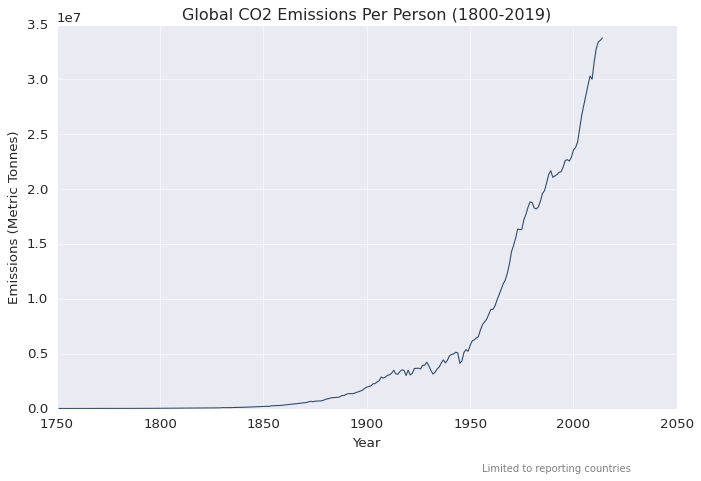

In [ ]:
import os

# plot the figure!
sb.set_style("darkgrid")
plt.figure(figsize=(9, 6))
fig1, ax = plt.subplots(figsize=(10, 6))
ax = sb.lineplot(data=sum_co2, x="Year", y="Emissions", color="#304d6d")
ax.set_ylabel("Emissions (Metric Tonnes)")
plt.figtext(
    0.75, -0.03,                       # x and y position (0-1 range in figure coords)
    "Limited to reporting countries",
    ha="center", fontsize=9, color="gray"
)
ax.set_title("Global CO2 Emissions Per Person (1800-2019)");

# Create the directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

# save png for later use
fig1.savefig("plots/World_CO2.png", dpi = 300, bbox_inches = 'tight')

### Top 10 countries in 2010 (1900-2014)

Now let's see the top 10 countries!

In [ ]:
# filter for top ten countries

top_10_countries = data_long_co2[data_long_co2["Year"] == 2014]
top_10_countries = top_10_countries.sort_values(by="Value", ascending=False).head(10)
top_10_countries

,Country,Year,Label,Indicator,Value,Region
28509,China,2014,CO2 Emissions (Metric Tons),Emissions,10300000.0,Rest of the World
145725,United States,2014,CO2 Emissions (Metric Tons),Emissions,5250000.0,Rest of the World
60189,India,2014,CO2 Emissions (Metric Tons),Emissions,2240000.0,Rest of the World
111669,Russia,2014,CO2 Emissions (Metric Tons),Emissions,1710000.0,Rest of the World
66525,Japan,2014,CO2 Emissions (Metric Tons),Emissions,1210000.0,Rest of the World
50685,Germany,2014,CO2 Emissions (Metric Tons),Emissions,720000.0,Rest of the World
61773,Iran,2014,CO2 Emissions (Metric Tons),Emissions,649000.0,Rest of the World
114837,Saudi Arabia,2014,CO2 Emissions (Metric Tons),Emissions,601000.0,Rest of the World
123549,South Korea,2014,CO2 Emissions (Metric Tons),Emissions,587000.0,Rest of the World
24549,Canada,2014,CO2 Emissions (Metric Tons),Emissions,537000.0,Rest of the World


In [ ]:
#Creating the top 10 list of countries
top_10_list = top_10_countries["Country"].tolist()
top_10_list

['China',
 'United States',
 'India',
 'Russia',
 'Japan',
 'Germany',
 'Iran',
 'Saudi Arabia',
 'South Korea',
 'Canada']

In [ ]:
#Creating a dataframe where it shows the top 10 counntries
top_10_df = data_long_co2[(data_long_co2["Year"] <= 2014) &
                                    (data_long_co2["Country"].isin(top_10_list)) &
                                    (data_long_co2["Year"] >= 1900)
                                    ]
#Making the items in the dataframe a category type
top_10_df = top_10_df.copy()
top_10_df["Country"] = top_10_df["Country"].astype('category')
top_10_df["Country"] = top_10_df["Country"].cat.remove_unused_categories()
top_10_df

,Country,Year,Label,Indicator,Value,Region
24207,Canada,1900,CO2 Emissions (Metric Tons),Emissions,20600.0,Rest of the World
24210,Canada,1901,CO2 Emissions (Metric Tons),Emissions,23900.0,Rest of the World
24213,Canada,1902,CO2 Emissions (Metric Tons),Emissions,25700.0,Rest of the World
24216,Canada,1903,CO2 Emissions (Metric Tons),Emissions,28000.0,Rest of the World
24219,Canada,1904,CO2 Emissions (Metric Tons),Emissions,33100.0,Rest of the World
...,...,...,...,...,...,...
145713,United States,2010,CO2 Emissions (Metric Tons),Emissions,5400000.0,Rest of the World
145716,United States,2011,CO2 Emissions (Metric Tons),Emissions,5290000.0,Rest of the World
145719,United States,2012,CO2 Emissions (Metric Tons),Emissions,5120000.0,Rest of the World
145722,United States,2013,CO2 Emissions (Metric Tons),Emissions,5160000.0,Rest of the World


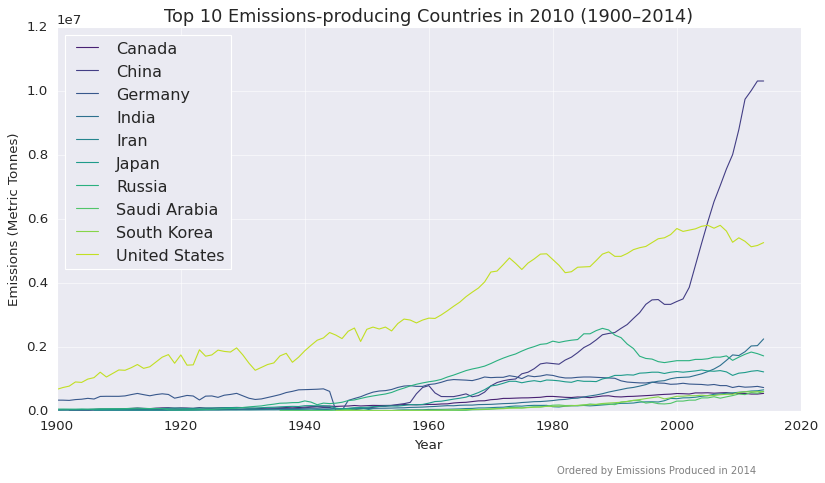

In [ ]:
#styling the type of graph
sb.set_style("darkgrid")
#Creating the figure for the tope 10 emitting countries
plt.figure(figsize=(12, 6))
ax = sb.lineplot(
    data=top_10_df[top_10_df["Country"].isin(top_10_list)],
    x="Year",
    y="Value",
    hue="Country",
    palette="viridis",
    estimator=None
)
#Adding titles and labels
ax.set_title("Top 10 Emissions-producing Countries in 2010 (1900–2014)", fontsize=16)
ax.set_ylabel("Emissions (Metric Tonnes)")

plt.legend(loc='upper left')
plt.figtext(0.75, -0.03, "Ordered by Emissions Produced in 2014", ha="center", fontsize=9, color="gray");

### Tile Plot

This time we will create a tile plot.

To create this plot we will filter our data to include only the Countries included in the Country variable of the `top_10_countries`. Then, we will use `.sort_values()` to order our countries based on the last emission value in 2014.

In [ ]:
# filter the data accordingly
filtered_data = (data_long_co2
                 [data_long_co2['Country'].isin(top_10_list)]
                 [data_long_co2['Year'] >= 1900])

/tmp/ipython-input-2616457786.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = (data_long_co2


In [ ]:
filtered_data.head()

,Country,Year,Label,Indicator,Value,Region
24207,Canada,1900,CO2 Emissions (Metric Tons),Emissions,20600.0,Rest of the World
24210,Canada,1901,CO2 Emissions (Metric Tons),Emissions,23900.0,Rest of the World
24213,Canada,1902,CO2 Emissions (Metric Tons),Emissions,25700.0,Rest of the World
24216,Canada,1903,CO2 Emissions (Metric Tons),Emissions,28000.0,Rest of the World
24219,Canada,1904,CO2 Emissions (Metric Tons),Emissions,33100.0,Rest of the World


In [ ]:
# get ordering of countries by their last (2014) value
country_order = (filtered_data
                 [filtered_data['Year'] == filtered_data['Year'].max()]
                 .sort_values('Value', ascending=False)['Country'].tolist())
country_order

['China',
 'United States',
 'India',
 'Russia',
 'Japan',
 'Germany',
 'Iran',
 'Saudi Arabia',
 'South Korea',
 'Canada']

In [ ]:
# create pivot table for heatmap
heatmap_data = filtered_data.pivot(index='Country', columns='Year', values='Value')

In [ ]:
# reorder rows according to the country_order
heatmap_data = heatmap_data.reindex(country_order)

In [ ]:
heatmap_data.head()

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,,,,,,,
China,NaN,NaN,95.3,1970.0,2090.0,2300.0,17100.0,16900.0,22800.0,20900.0,...,5900000.0,6530000.0,7030000.0,7550000.0,8000000.0,8780000.0,9730000.0,10000000.0,10300000.0,10300000.0
United States,663000.0,722000.0,765000.0,895000.0,881000.0,985000.0,1030000.0,1200000.0,1050000.0,1160000.0,...,5790000.0,5700000.0,5790000.0,5610000.0,5260000.0,5400000.0,5290000.0,5120000.0,5160000.0,5250000.0
India,13100.0,14400.0,15900.0,16200.0,18100.0,18500.0,21400.0,23800.0,27300.0,26300.0,...,1220000.0,1300000.0,1410000.0,1570000.0,1740000.0,1720000.0,1840000.0,2020000.0,2030000.0,2240000.0
Russia,46800.0,48100.0,46400.0,45400.0,50500.0,45100.0,51400.0,57600.0,58000.0,61200.0,...,1620000.0,1670000.0,1670000.0,1710000.0,1570000.0,1670000.0,1760000.0,1830000.0,1780000.0,1710000.0
Japan,19400.0,23300.0,25000.0,25800.0,29100.0,30000.0,32900.0,35100.0,37700.0,38300.0,...,1240000.0,1230000.0,1250000.0,1210000.0,1100000.0,1170000.0,1190000.0,1230000.0,1250000.0,1210000.0


Since there seems to be an issue with the data type, we need to ensure the values are all numeric before we can apply log the data using `np.log()` for the faceted plot!

In [ ]:
# ensure your data is properly formatted
# reset index if Country is currently the index
if 'Country' not in heatmap_data.columns:
    heatmap_data_working = heatmap_data.reset_index()
else:
    heatmap_data_working = heatmap_data.copy()

# set Country as index if it's not already
if 'Country' in heatmap_data_working.columns:
    heatmap_data_working = heatmap_data_working.set_index('Country')

# ensure all columns are numeric
# convert all columns to numeric, replacing any non-numeric values with NaN
for col in heatmap_data_working.columns:
    heatmap_data_working[col] = pd.to_numeric(heatmap_data_working[col], errors='coerce')

print("Data shape:", heatmap_data_working.shape)
print("Data types:", heatmap_data_working.dtypes.unique())

# handle problematic values for log transformation
# replace NaN, zero, and negative values
log_data = heatmap_data_working.copy()

# replace zeros and negative values with small positive number
log_data = log_data.where(log_data > 0, np.nan)  # replace <=0 with NaN
log_data = log_data.fillna(1)  # fill NaN with 1 (log(1) = 0)

# apply log transformation using pandas
log_data = log_data.apply(lambda x: np.log(x))

Data shape: (10, 115)
Data types: [dtype('float64')]


<Figure size 1200x640 with 0 Axes>

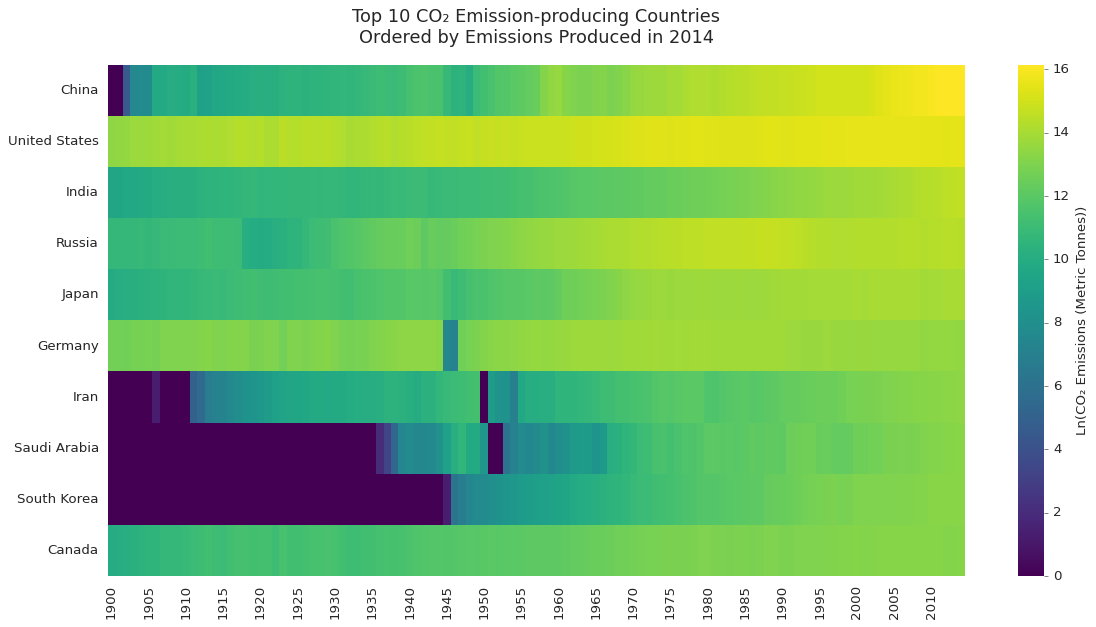

In [ ]:
# create the heatmap
plt.figure(figsize=(15, 8))
fig2, ax2 = plt.subplots(figsize=(15, 8))

# create heatmap
mask = log_data.isna()  # mask any remaining NaN values
ax2 = sns.heatmap(log_data,
                  cmap='viridis',
                  mask=mask,
                  cbar_kws={'label': 'Ln(CO₂ Emissions (Metric Tonnes))'})

# customize the plot
plt.title('Top 10 CO₂ Emission-producing Countries\nOrdered by Emissions Produced in 2014',
          fontsize=16, pad=20)

# set x-axis ticks to show every 5 years from 1900 to 2014
years = list(range(1900, 2015, 5))
year_positions = []
year_labels = []

# find positions of years that exist in the data
for year in years:
    # check both integer and string versions
    year_candidates = [year, str(year)]
    for year_candidate in year_candidates:
        if year_candidate in log_data.columns:
            try:
                pos = log_data.columns.get_loc(year_candidate)
                year_positions.append(pos + 0.5)  # center the tick
                year_labels.append(str(year))
                break
            except:
                continue

plt.xticks(year_positions, year_labels, rotation=90, fontsize=12)
plt.yticks(np.arange(len(log_data.index)) + 0.5, log_data.index, rotation=0, fontsize=12)

# remove axis labels
plt.xlabel('')
plt.ylabel('')

# adjust layout and save
plt.tight_layout()
fig2.savefig("plots/Top10_CO2_tile.png", dpi=300, bbox_inches='tight')
plt.show();

## CO2, GDP & Emissions: Compare Vietnam with the Rest of the World

### Faceted plot

We can plot multiple plots simultaneously faceting the data by indicator and using `plt.subplots()`.

In [ ]:
data_long.head(3)

,Country,Year,Label,Indicator,Value,Disaster_Count,Region
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN,NaN,Rest of the World
101499,Afghanistan,1751,CO2 Emissions (Metric Tons),GDP,NaN,NaN,Rest of the World
202998,Afghanistan,1751,CO2 Emissions (Metric Tons),Energy,NaN,NaN,Rest of the World


In this case, we want the y-axis to be used across the rows.

Again, we appear to be running to data format issues so let's be sure to clean that up!

In [ ]:
# define a function to clean the data
def clean_value_column(df):
    """
    Clean the 'Value' column by converting string representations to numbers
    Handles formats like: '10.3k', '1.2M', '500', etc.
    """
    df = df.copy()

    def convert_value(val):
        if pd.isna(val):
            return np.nan

        # convert to string and clean
        val_str = str(val).strip().lower()

        # handle empty strings
        if val_str == '' or val_str == 'nan':
            return np.nan

        # handle already numeric values
        try:
            return float(val_str)
        except ValueError:
            pass

        # handle k, m, b suffixes
        multipliers = {
            'k': 1000,
            'm': 1000000,
            'b': 1000000000,
            't': 1000000000000
        }

        # check if it ends with a multiplier
        for suffix, multiplier in multipliers.items():
            if val_str.endswith(suffix):
                try:
                    number = float(val_str[:-1])
                    return number * multiplier
                except ValueError:
                    return np.nan

        # if we can't convert it, return NaN
        return np.nan

    # apply the conversion
    df['Value'] = df['Value'].apply(convert_value)
    return df

In [ ]:
# clean the data first
print("Cleaning data...")
filtered_data = data_long[~data_long['Indicator'].isin(['Disasters', 'Temperature'])]

# clean the Value column
filtered_data = clean_value_column(filtered_data)

# check for any remaining non-numeric values
print("Checking for remaining issues...")
print("Non-numeric values:", filtered_data['Value'].apply(lambda x: not isinstance(x, (int, float, type(np.nan)))).sum())
print("NaN values:", filtered_data['Value'].isna().sum())

Cleaning data...
Checking for remaining issues...
Non-numeric values: 0
NaN values: 242511


In [ ]:
# remove rows with NaN values if needed
filtered_data = filtered_data.dropna(subset=['Value'])

In [ ]:
# get unique indicators and regions for faceting
indicators = filtered_data["Indicator"].unique()
regions = filtered_data['Region'].unique()
n_indicators = len(indicators)
n_regions = len(regions)

# check what we got
print(f"Number of indicators: {n_indicators}")
print(f"Number of regions: {n_regions}")
print(f"List of indicators: {indicators}")
print(f"List of regions: {regions}")

Number of indicators: 3
Number of regions: 2
List of indicators: ['GDP' 'Emissions' 'Energy']
List of regions: ['Rest of the World' 'Vietnam']


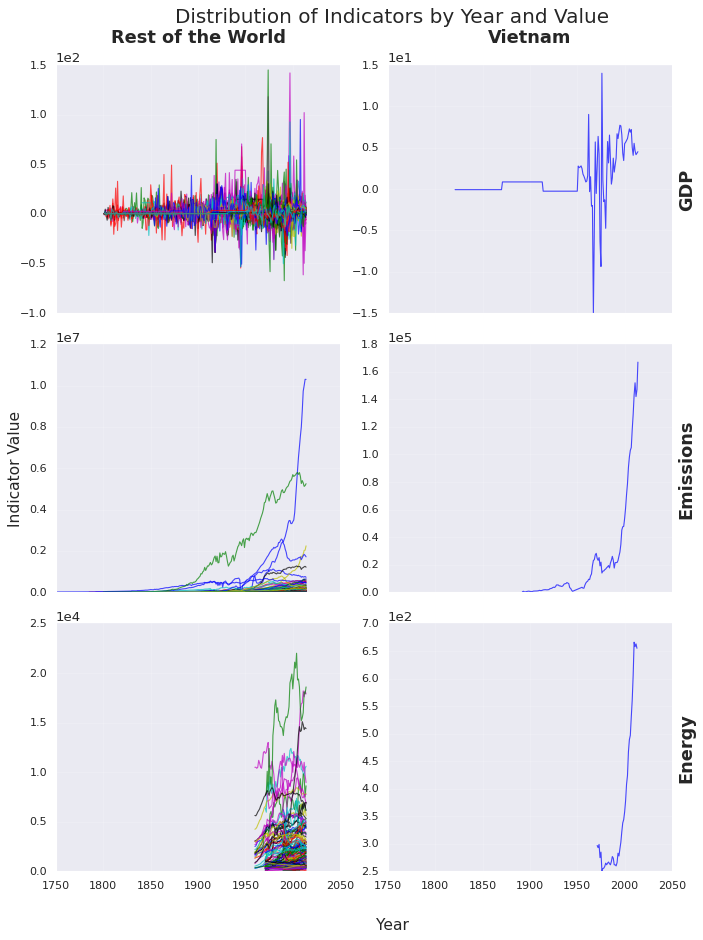

In [ ]:
# Create subplot grid
fig, axes = plt.subplots(n_indicators, n_regions,
                        figsize=(5 * n_regions, 4 * n_indicators),
                        sharex=True)

# Handle cases where there's only one indicator or region
if n_indicators == 1 and n_regions == 1:
    axes = [[axes]]
elif n_indicators == 1:
    axes = [axes]
elif n_regions == 1:
    axes = [[ax] for ax in axes]

# Plot each combination of Indicator and Region
for i, indicator in enumerate(indicators):
    for j, region in enumerate(regions):
        ax = axes[i][j]

        # Filter data for this specific indicator and region
        subset = filtered_data[
            (filtered_data['Indicator'] == indicator) &
            (filtered_data['Region'] == region)
        ]

        if not subset.empty:
            # Plot lines for each country in this subset
            for country in subset['Country'].unique():
                country_data = subset[subset['Country'] == country]

                # Sort by year to ensure proper line connection
                country_data = country_data.sort_values('Year')

                # Additional check to ensure we have numeric data
                if len(country_data) > 0 and country_data['Value'].notna().any():
                    try:
                        ax.plot(country_data['Year'], country_data['Value'],
                               linewidth=1, alpha=0.7, label=country)
                    except Exception as e:
                        print(f"Error plotting {country} in {region}, {indicator}: {e}")
                        continue

        # Add strip labels (equivalent to strip.text)
        # Column headers (Region) at the top
        if i == 0:
            ax.set_title(region, fontsize=16, fontweight='bold', pad=20)

        # Row headers (Indicator) on the right
        if j == n_regions - 1:
            ax.text(1.02, 0.5, indicator, transform=ax.transAxes,
                   rotation=90, verticalalignment='center',
                   fontsize=16, fontweight='bold')

        # Apply custom theme styling (equivalent to my_theme)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=10)

        # Remove individual subplot labels
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Format y-axis to show values in a readable format
        ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Set overall title and labels
fig.suptitle('Distribution of Indicators by Year and Value',
            fontsize=18, y=0.98)

# Add shared axis labels
fig.text(0.5, 0.02, 'Year', ha='center', fontsize=14)
fig.text(0.02, 0.5, 'Indicator Value', va='center', rotation='vertical',
         fontsize=14)

# Adjust layout to accommodate labels and titles
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.08, right=0.85)

plt.show();

In [ ]:
# show some statistics about the cleaned data
print("Data cleaning summary:")
print(f"Total rows after cleaning: {len(filtered_data)}")
print(f"Value column statistics:")
print(filtered_data['Value'].describe())

Data cleaning summary:
Total rows after cleaning: 61986
Value column statistics:
count    6.198600e+04
mean     2.308344e+04
std      2.162439e+05
min     -6.750000e+01
25%      4.120000e-01
50%      2.620000e+00
75%      8.290000e+02
max      1.030000e+07
Name: Value, dtype: float64


## CO2 Emissions and Temperature in Vietnam

### Scatterplots

### CO2 Emissions and Temperature, separately

Let's create a scatterplot of CO2 emissions and temperature separately to better understand their respective distributions!

Per usual, we want to filter and adjust our data according to the task at hand. In this case, we want to ensure the `Year` column in `data_long` is of `int` type. We'll also want to create a new dataframe by filtering for years 1980-2014 in Vietnam with only the `Emissions` and `Temperature` indicators!

In [ ]:
# ensure all values under Year are int type
year_int = data_long["Year"].astype(int)
data_long["Year"] = year_int

# ENSURE YEAR IS OF INT TYPE
data_long["Year"] = data_long["Year"].astype(int).tolist()

In [ ]:
# check to ensure that data_long has all of the indicators
data_long["Indicator"].unique()

array(['Emissions', 'GDP', 'Energy', 'Temperature', 'Disasters'],
      dtype=object)

In [ ]:
data_long.head()

,Country,Year,Label,Indicator,Value,Disaster_Count,Region
0,Afghanistan,1751,CO2 Emissions (Metric Tons),Emissions,NaN,NaN,Rest of the World
101499,Afghanistan,1751,CO2 Emissions (Metric Tons),GDP,NaN,NaN,Rest of the World
202998,Afghanistan,1751,CO2 Emissions (Metric Tons),Energy,NaN,NaN,Rest of the World
1,Afghanistan,1752,CO2 Emissions (Metric Tons),Emissions,NaN,NaN,Rest of the World
101500,Afghanistan,1752,CO2 Emissions (Metric Tons),GDP,NaN,NaN,Rest of the World


In [ ]:
# filter data to only include the Emissions and Temperature indicators from 1980-2014
filtered_data_long = data_long[
    (data_long['Year'] >= 1980) &
    (data_long['Year'] <= 2014) &
    (data_long['Country'] == 'Vietnam') &
    (data_long['Indicator'].isin(['Emissions', 'Temperature']))
]

In [ ]:
filtered_data_long.head(3)

,Country,Year,Label,Indicator,Value,Disaster_Count,Region
99795,Vietnam,1980,CO2 Emissions (Metric Tons),Emissions,16800.0,NaN,Vietnam
99796,Vietnam,1980,"Energy Use (kg, oil-eq./capita)",Emissions,NaN,NaN,Vietnam
99797,Vietnam,1980,GDP Growth/Capita (%),Emissions,NaN,NaN,Vietnam


Time to actually plot now! To draw a generalizing line along the scatterplots, we can use `statsmodels`'s `lowess` feature to add a smooth line on top of the data points!

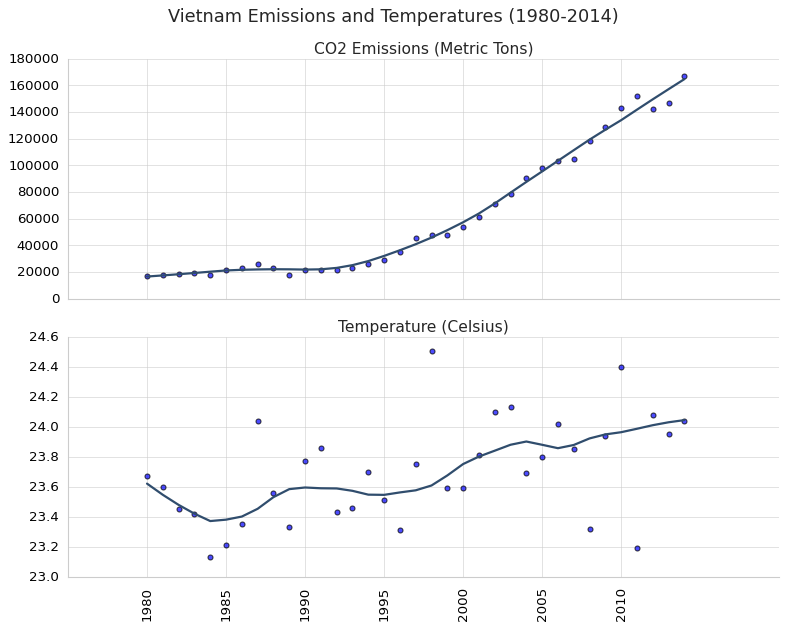

In [ ]:
# Create the plot with facets
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Get unique indicators for faceting
indicators = filtered_data_long['Indicator'].unique()

for i, indicator in enumerate(indicators):
    # Filter data for current indicator
    subset = filtered_data_long[filtered_data_long['Indicator'] == indicator]

    # Plot points (equivalent to geom_point)
    axes[i].scatter(subset['Year'], subset['Value'], alpha=0.7)

    # Add smooth line (equivalent to geom_smooth with loess)
    # Using lowess (locally weighted scatterplot smoothing) as pandas equivalent to loess
    from statsmodels.nonparametric.smoothers_lowess import lowess
    smoothed = lowess(subset['Value'], subset['Year'], frac=0.3)
    axes[i].plot(smoothed[:, 0], smoothed[:, 1], color='#304d6d', linewidth=2)

    # Set y-axis to free scale (equivalent to scales = "free_y")
    # This happens automatically with subplots

    # Set subplot title using Label column (equivalent to facet_wrap Label)
    if 'Label' in subset.columns:
        axes[i].set_title(subset['Label'].iloc[0], fontsize=14)
    else:
        axes[i].set_title(indicator, fontsize=14)

    # Remove axis titles (equivalent to axis.title = element_blank())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Customize tick labels
    axes[i].tick_params(axis='both', which='major', labelsize=12, colors='black')

# Set x-axis breaks and labels (equivalent to scale_x_continuous)
x_ticks = range(1980, 2015, 5)
plt.xticks(x_ticks, x_ticks, rotation=90, fontsize=12, color='black')

# Set main title
fig.suptitle('Vietnam Emissions and Temperatures (1980-2014)', fontsize=16)

# Apply classic theme styling
plt.style.use('classic')
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
# save graph before showing
fig.savefig('plots/CO2_temp_Vietnam_facet.png', dpi=300, bbox_inches='tight')
plt.show();

### CO2 Emissions and Temperature, together: exploring correlation

Now, instead of looking at the variables separately in faceted plots, let’s look at the relationship between CO2 emissions and other variables directly. Thus, it is useful to have each of these indicators as their own variable.
We can do this by using `.pivot_table()` to transform our long data table into a wide format.

In [ ]:
wide_viet = (
    data_long
    .query("Country == 'Vietnam' & Year >= 1980 & Year <= 2014")
    # .drop(columns=['Label'])
    .pivot_table(index=['Country', 'Year'],
                 columns='Indicator',
                 values='Value',
                 aggfunc='first',
                 observed=True)
    .reset_index()
)

We appear to run into issues of data type once again so we'll need to clean it up first.

In [ ]:
# create a clean copy and convert to numeric
wide_viet_clean = wide_viet.copy()

# convert columns to numeric, replacing any non-numeric values with NaN
wide_viet_clean['Emissions'] = pd.to_numeric(wide_viet_clean['Emissions'], errors='coerce')
wide_viet_clean['Temperature'] = pd.to_numeric(wide_viet_clean['Temperature'], errors='coerce')

# remove rows with NaN values
wide_viet_clean = wide_viet_clean.dropna(subset=['Emissions', 'Temperature'])

# ensure we have valid numeric data
wide_viet_clean = wide_viet_clean[
    (wide_viet_clean['Emissions'].notna()) &
    (wide_viet_clean['Temperature'].notna()) &
    (np.isfinite(wide_viet_clean['Emissions'])) &
    (np.isfinite(wide_viet_clean['Temperature']))
]

print(f"Clean data shape: {wide_viet_clean.shape}")

Clean data shape: (35, 6)


Time to plot!

It might be helpful to add a trend line to this. We can do so by using `sns.regplot()` to make a linear regression as it adds a line to the data based on a linear model of the data.

We can simply add this to the plot object to create a plot with this trend line.

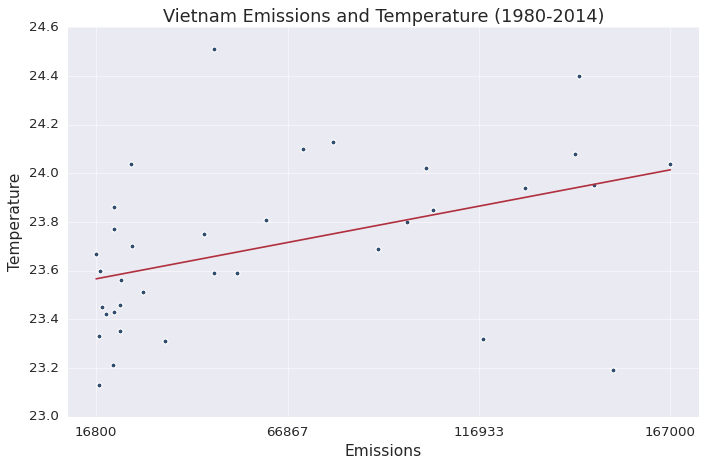

In [ ]:
# create the plot
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(9, 6))

# create scatter plot
ax.scatter(wide_viet_clean['Emissions'], wide_viet_clean['Temperature'], c="#304d6d")

# set labels and title
ax.set_xlabel('Emissions (Metric Tonnes)', fontsize=14)
ax.set_ylabel('Temperature (Fahrenheit)', fontsize=14)
ax.set_title('Vietnam Emissions and Temperature (1980-2014)', fontsize=16)

# customize tick labels
if len(wide_viet_clean) > 0:
    ax.set_xticks(np.linspace(wide_viet_clean['Emissions'].min(),
                              wide_viet_clean['Emissions'].max(),
                              4))

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add regression line
if len(wide_viet_clean) >= 2:
    sns.regplot(
        data=wide_viet_clean,
        x="Emissions",
        y="Temperature",
        scatter=False,
        ci=None,
        ax=ax,
        color="#B1303F"
    )

# show the plot
plt.tight_layout()
plt.show()

Indeed, it does look like there is a positive, linear trend.

Now let's save this graph.

In [ ]:
# 1. Save the DataFrame object (CO2_temp_US) to a file
with open("plots/CO2_temp_Vietnam.pkl", "wb") as f:
    pickle.dump(wide_viet, f)

# 2. Save the plot as a PNG
plt.figure(figsize=(8, 6))
sns.scatterplot(data=wide_viet, x="Emissions", y="Temperature")
plt.title("US Emissions and Temperature (1980–2014)")
plt.savefig("plots/CO2_temp_Vietnam.png", dpi=300, bbox_inches="tight")
plt.close()

Now that we see that there might be a linear relationship between CO2 emissions and temperature, let’s learn about some statistical techniques to measure the strength of that relationship.

# Data Analysis

Here, we'll now explore how two variables work together in greater detail. We'll focus on the two variables we've been working on, **CO2 and temperature**. However, feel free to look at the relationships between other variables!

We can use the correlation coefficient. Here, we are using this summary statistic to measure the strength of a linear relationship between two variables.

If we plot one variable on the x-axis and the other variable on the y-axis, we can see:

- The strength of the relationship - based on how well the points form a line
- The direction of the relationship - based on if the points progress upward or downward

If the variables point upward in a very clear line, then there is a strong positive relationship. If the points do not really form a line, then there is a weak linear relationship or no linear relationship. There may however be a nonlinear relationship if the points create a different but defined shape. If the points form a downward sloping line, then there is a negative relationship.

The correlation coefficients ranges from -1 to 1. A value of zero indicates that there is no correlation between the variables. While a value of 1 or -1 indicates perfect correlation, the closer the coefficient is to 1 or -1, the stronger the relationship. The sign of the coefficient indicates the direction of the relationship. If there is a negative relationship then the variables show opposing changes from each other - as one gets larger the other gets smaller. If the sign is positive, then the variables increase similarly.

We'll be interested in calculating the correlation coefficient for emissions and temperature here. But first, let's calculate the mean and SD for these two variables!

### Basic Summary Statistics: Mean and SD

In [ ]:
# summary table containing mean and SD for emissions and temperature

viet_co2_mean = wide_viet["Emissions"].mean()
viet_co2_std = wide_viet["Emissions"].std()
viet_temp_mean = wide_viet["Temperature"].mean()
viet_temp_std = wide_viet["Temperature"].std()

summary_table = pd.DataFrame({"Emissions (Mean)":[viet_co2_mean],
                              "Emissions (Std Dev)":[viet_co2_std],
                              "Temperature (Mean)":[viet_temp_mean],
                              "Temperature (Std Dev)":[viet_temp_std]})
summary_table

,Emissions (Mean),Emissions (Std Dev),Temperature (Mean),Temperature (Std Dev)
0,62211.428571,48788.612289,23.701714,0.339112


## Correlation coefficient

Let’s calculate the Pearson’s correlation coefficient called “Rho” $\rho$ between CO2 emissions and temperature in the US. There are a few ways to calculate a correlation coefficient and this is one of the most common.

Formally, if we have a pair of observations $(x_1, y_1), \dots, (x_n, y_n)$, the correlation coefficient $ \rho $ between $ x $ and $ y $ is defined as:  

$
\rho = \frac{1}{n - 1} \sum_{i=1}^n
\left( \frac{x_i - \mu_x}{\sigma_x} \right)
\left( \frac{y_i - \mu_y}{\sigma_y} \right)
$

where $ \mu_x, \mu_y $ are the means of $ x_1, \dots, x_n $ and $ y_1, \dots, y_n $, respectively, and $ \sigma_x, \sigma_y $ are the standard deviations.

Therefore, we can standardize the two variables and essentially average (the denominator is n-1) the standardized values to calculate the correlation coefficient `rho`.

Here we will manually perform the calculation.

In [ ]:
# number of rows (samples)
n = len(wide_viet)
print("Number of samples:", n)  # 35

# calculate rho manually
rho = (1 / (n - 1)) * np.sum(
    ((wide_viet['Emissions'] - wide_viet['Emissions'].mean()) / wide_viet['Emissions'].std(ddof=0)) *
    ((wide_viet['Temperature'] - wide_viet['Temperature'].mean()) / wide_viet['Temperature'].std(ddof=0))
)
print("Rho:", rho)  # 0.441886

# alternatively, using pandas built-in correlation (Pearson by default)
r = wide_viet['Emissions'].corr(wide_viet['Temperature'], method='pearson')
print("Correlation coefficient:", r)

Number of samples: 35
Rho: 0.44188624775608765
Correlation coefficient: 0.42926092639162805


Our correlation coefficient `r` appears to equal approximately `0.429`.

## Relationship between correlation and linear regression

Let’s briefly discuss the relationship between correlation and linear regression!

We can use a regression line to predict a random variable \( Y \) given that we have gathered or observed some data about another variable $ X = x $.

The regression line is formally defined as:

$
\frac{Y - \mu_Y}{\sigma_Y} = \rho \frac{x - \mu_X}{\sigma_X}
$

where $\mu_X$ and $\sigma_X$ ($\mu_Y$ and $\sigma_Y$) are the mean and standard deviation of $X (Y)$, and $\rho$ is the correlation between $X$ and $Y$.  
If $x$ is larger than $\mu_X$, then for every $\sigma_X$ increase, $Y$ will also increase $\rho$ standard deviations above $\mu_Y$.

Re-organizing the terms so that $Y$ is on the left side, we get:

$
Y = \mu_Y + \rho \frac{x - \mu_X}{\sigma_X} \sigma_Y
$

Thinking about some extreme examples:
- If $\rho = 0$ (no correlation), we ignore the $x$ term entirely and only predict $Y$ using the mean $\mu_Y$.
- If $\rho = 1$ or $-1$ (perfect correlation), the regression line predicts an increase (or decrease) that is the same number of standard deviations.
- If $\rho$ is between $-1$ and $1$, then we predict using both terms on the right-hand side.

To add regression lines to plots, we will need the formula in the form:

$
y = b + m x
$
with slope
$
m = \rho \frac{\sigma_Y}{\sigma_X}
$
and intercept
$
b = \mu_Y - m \mu_X
$

In our example, we can calculate the slope and intercept using the formula above and plot the line.

Let's clean the data before scaling it!

In [ ]:
# convert to numeric and clean
wide_viet_clean = wide_viet.copy()

# convert to numeric, coercing any non-numeric values to NaN
wide_viet_clean['Emissions'] = pd.to_numeric(wide_viet_clean['Emissions'], errors='coerce')
wide_viet_clean['Temperature'] = pd.to_numeric(wide_viet_clean['Temperature'], errors='coerce')

# remove rows with NaN values
wide_viet_clean = wide_viet_clean.dropna(subset=['Emissions', 'Temperature'])

print(f"Data points: {len(wide_viet_clean)}")

if len(wide_viet_clean) >= 2:
    # scale the data like R's scale()
    wide_viet_clean['Emissions_scaled'] = (
        (wide_viet_clean['Emissions'] - wide_viet_clean['Emissions'].mean()) /
        wide_viet_clean['Emissions'].std(ddof=0)
    )
    wide_viet_clean['Temperature_scaled'] = (
        (wide_viet_clean['Temperature'] - wide_viet_clean['Temperature'].mean()) /
        wide_viet_clean['Temperature'].std(ddof=0)
    )

Data points: 35


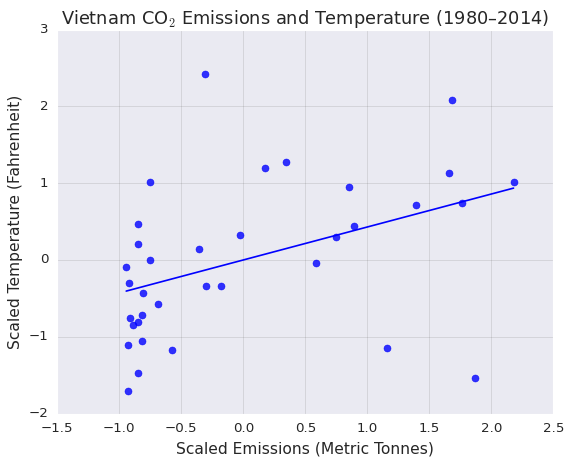

In [ ]:
# scale the data like R's scale()
wide_viet_clean['Emissions_scaled'] = (wide_viet_clean['Emissions'] - wide_viet_clean['Emissions'].mean()) / wide_viet_clean['Emissions'].std(ddof=0)
wide_viet_clean['Temperature_scaled'] = (wide_viet_clean['Temperature'] - wide_viet_clean['Temperature'].mean()) / wide_viet_clean['Temperature'].std(ddof=0)

# create scatter plot + regression line
plt.figure(figsize=(8,6))
sns.regplot(
    x='Emissions_scaled',
    y='Temperature_scaled',
    data=wide_viet_clean,
    ci=None,  # se = FALSE in R
    scatter_kws={'s': 40}  # point size
)

# labels and title
plt.title(r"Vietnam CO$_2$ Emissions and Temperature (1980–2014)", fontsize=16)
plt.xlabel("Scaled Emissions (Metric Tonnes)", fontsize=14)
plt.ylabel("Scaled Temperature (Fahrenheit)", fontsize=14)

# tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# grid style
plt.grid(True, linestyle='-', linewidth=0.5, color='#696969', alpha=0.3)

plt.show()

Let's save the graph!

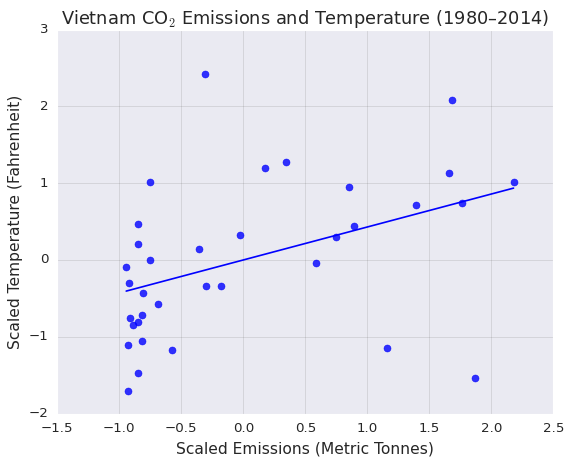

In [ ]:
plots_dir = Path("plots")

# save the underlying data
with open(plots_dir / "wide_viet_clean.pkl", "wb") as f:
    pickle.dump(wide_viet_clean, f)

# recreate and save the plot
plt.figure(figsize=(8,6))
sns.regplot(
    x='Emissions_scaled',
    y='Temperature_scaled',
    data=wide_viet_clean,
    ci=None,  # se = FALSE
    scatter_kws={'s': 40}
)

# Labels and title
plt.title(r"Vietnam CO$_2$ Emissions and Temperature (1980–2014)", fontsize=16)
plt.xlabel("Scaled Emissions (Metric Tonnes)", fontsize=14)
plt.ylabel("Scaled Temperature (Fahrenheit)", fontsize=14)

# Ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='-', linewidth=0.5, color='#696969', alpha=0.3)

# Save PNG
plt.savefig(plots_dir / "Vietnam_emissions_temp_scaled.png", dpi=300, bbox_inches='tight')

# Summary, including the summary plot

The last thing we will do here is to create a plot that summarizes our major findings. We will open the images from our `plots` folder using `Image.open()`. Then we will create a 2D plot for the images to display--think of it like a blank canvas. Then we'll display them by placing each `.png` in the appropriate coordinates. We'll then save it all into a `combined.png` plot and display this using `plt.show()`.

In [ ]:
# open images
vietnam_emissions_temp_scaled = Image.open('plots/Vietnam_emissions_temp_scaled.png')
co2_temp_vietnam_facet = Image.open('plots/CO2_temp_Vietnam_facet.png')
top10_co2_tile = Image.open('plots/Top10_CO2_tile.png')
world_co2 = Image.open('plots/World_CO2.png')

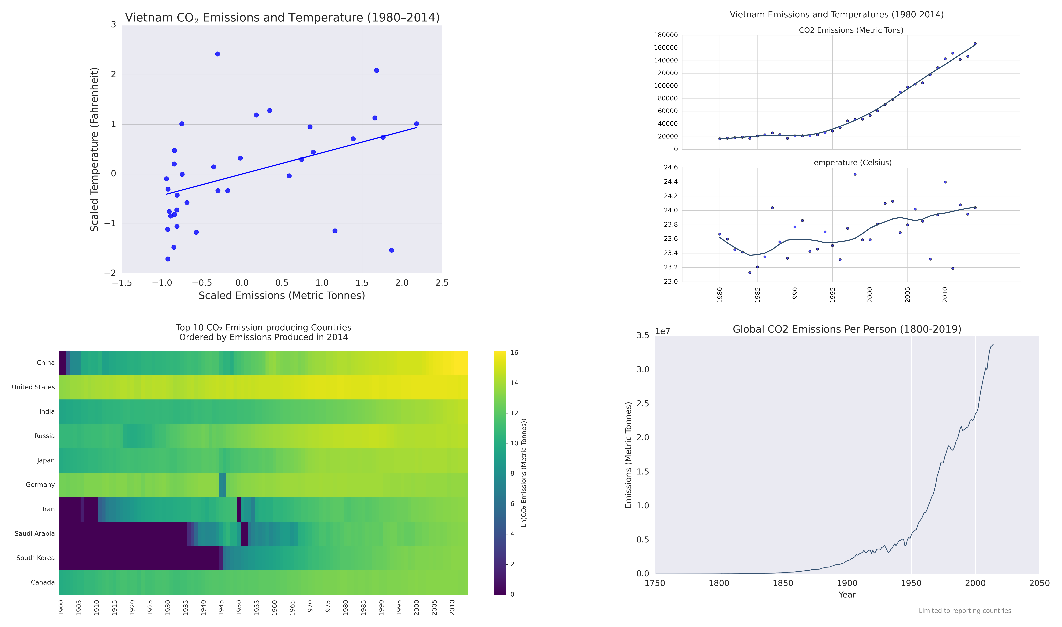

In [ ]:
fig5, axs = plt.subplots(2, 2, figsize=(15, 8)) # figsize for figure size

# Display images on respective subplots
axs[0, 0].imshow(vietnam_emissions_temp_scaled)
axs[0, 0].axis('off')
axs[0, 1].imshow(co2_temp_vietnam_facet)
axs[0, 1].axis('off')
axs[1, 0].imshow(top10_co2_tile)
axs[1, 0].axis('off')
axs[1, 1].imshow(world_co2)
axs[1, 1].axis('off')

# Adjusting layout
plt.tight_layout()
plt.savefig('combined_plot.png')
# Show the plot
plt.show()

# Synopsis

In this case study we evaluated CO2 emissions from as far back as 1751 for some countries to 2014. We discovered that global levels of CO2 emissions have dramatically increased over time. We also learned that some countries have been responsible for particularly high levels.

We also took a look at how CO2 emissions might relate to other factors, such as temperature, energy use, and natural disasters. We learned that we can summarize the relationship between two sets of data using correlation coefficients. We also learned that we can use regression to predict or describe how changes in one variable may influence changes in another variable. Importantly, we also learned that just because two variables show strong correlation or show an association, it does not necessarily indicate that they are causally related.

However, there is quite a bit of scientific evidence to indicate that in fact CO2 emissions trap heat and lead to increased global temperatures. Yet, it is important to realize that there are other factors involved in the relationship between US CO2 emissions and US annual average temperatures. For example there are CO2 emissions from other countries in the atmosphere, there are other greenhouse gases, there is already existing CO2 in the atmosphere that will continue to trap heat for many years, and finally there is heat trapped in the ocean due to previous emissions that will cause delayed changes in surface temperatures. However, it is vital that we work around the globe to reduce future greenhouse gas emissions to mitigate the increased temperatures that we will experience due to previous and existing CO2 emissions, so that the warming temperatures aren’t as extreme as they could be. Furthermore, we need to prepare for increased rates of natural disasters and how these may influence people around the world. Evidence suggests that impoverished people are the most affected by disasters. We need to be particularly mindful of this as we prepare for the future.